<h1><center>Applied Machine Learning Seminararbeit</center></h1>

![Alt-Text](mein_bild_2.jpeg)


<p style="text-align: center; font-size: 24px; font-family: 'Helvetica', 'Arial', sans-serif;">
  Technische Hochschule Ingolstadt <br>
  Data Science in Technik und Wirtschaft <br>
  Datensatz Lackdefekte <br>
  Aslihan Tunctürk <br>
</p>
<hr>


## Inhaltsverzeichnis
#### 1. Problembeschreibung
##### 1.1 Gründe für den Einsatz von ML
##### 1.2 Die Aufgabe, die Daten und mögliche Performance Metriken
##### 1.3 ML Kategorie Zuordnung

#### 2. Datenbereinigung und Vorbereitung
##### 2.1 Explorative Datenanalyse
##### 2.2 Umgang mit fehlenden Daten
##### 2.3 Umgang mit Ausreißern
##### 2.4 Überprüfung auf Datenfehler
##### 2.5 Überprüfung und Bereinigung von Duplikaten
##### 2.6 Daten standardisieren und transformieren
##### 2.7 Feature Selektion und Extraktion
##### 2.8 Zusammenführung, Modifikation und Aufteilung der Zielvariablen

#### 3. Modellierung und Evaluation
##### 3.1 Übersicht über Modelle, Loss-Funktionen und Bewertungsmetriken
##### 3.2 Modell Training
###### I. Decision Tree
###### II. Support Vector Machine
###### III. Deep Learning
###### IV. Vergleich der Modelle
##### 3.3 Überprüfen auf Over- und Underfitting
###### I. Decision Tree
###### II. Support Vector Machine
###### III. Deep Learning
##### 3.4 Ensemble

#### 4. Optimierung mit Optuna
###### I.Maßnahmen gegen Overfitting
###### II. Bestes Modell nach der Optimierung


#### Danksagung

Bei der Erstellung dieser Seminararbeit spielte der KI-basierte Assistent ChatGPT von OpenAI eine bedeutende Rolle. ChatGPT unterstützte mich in mehrfacher Hinsicht: Es half bei der Recherche und dem Auffinden relevanter Informationen, bei der klaren und strukturierten Formulierung von Textpassagen sowie bei der Programmierung und der Entwicklung von Code. Die Nutzung dieses fortschrittlichen Tools trug maßgeblich zur Effizienz und Qualität meiner Arbeit bei. Darüber hinaus wurde das Bildmaterial in dieser Arbeit mithilfe von DALL-E, einem weiteren KI-Tool von OpenAI, erstellt.


#### Quellenverzeichnis

OpenAI. ChatGPT (GPT-4). Verfügbar unter https://chat.openai.com/.

OpenAI. DALL-E. Verfügbar unter https://www.openai.com/dall-e/.

## B. Hauptteil

## 1. Problembeschreibung

### 1.1 Gründe für den Einsatz von ML

#### Wir verwenden ML, um die Schwere von Produktionsdefekten vorherzusagen:
- ML-Modelle ermöglichen es uns, präzise Vorhersagen über mögliche Produktionsfehler zu treffen, was die Effizienz der Qualitätskontrollen verbessert und potenzielle Produktionsausfälle minimiert.
#### ML-Algorithmen können komplexe Muster und Beziehungen in Daten erkennen, die für Menschen schwer zu durchschauen sind:
- Aufgrund der Vielfalt der Variablen im Datensatz, wie Defektkategorien, Schweregrade und physikalische Messwerte, kann ML verborgene Muster aufdecken, die auf bestimmte Defekte oder Produktionsbedingungen hinweisen, was ohne automatisierte Analysemethoden nicht möglich wäre.
#### ML-Modelle können den Prozess der Datenanalyse und Vorhersage automatisieren. Sobald das Modell trainiert ist, kann es schnell und effizient Vorhersagen treffen:
- Nach dem Training kann das ML-Modell automatisch neue Daten analysieren und schnell entscheiden, ob ein Defekt vorliegt und wie schwerwiegend er ist. Diese Automatisierung spart Zeit und Ressourcen, indem sie manuelle Fehlerprüfungen reduziert und die Reaktionsgeschwindigkeit auf Produktionsfehler erhöht.
#### Lernen und Besserwerden:
- Die Maschine kann aus Erfahrungen lernen und dadurch besser werden. Das ist wichtig, wenn sich die Arten von Fehlern ändern. Die Maschine kann sich immer anpassen.

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_1, Teil des Kurses "Applied Machine Learning", Seite 21, 23.

### 1.2  Die Aufgabe, die Daten und mögliche Performance Metriken (Definition Mitchell)

- Task: Vorhersagen der Schwere von Produktionsdefekten
- Experience: Der verwendete Datensatz enthält Merkmale wie Versuchsnummer, Kennung des Defekts, Defektkategorie, Status, Maximale und minimale z-Werte, Volumenangaben, Länge, Farbe der Beschichtung, Schwere des Defekts
- Performance Measure: Als Performance-Metriken werden die Genauigkeit (Accuracy), die Präzision (Precision) und die Wiederabrufquote (Recall) verwendet, um die Effektivität des Modells in der Identifikation tatsächlicher Abwanderungsfälle zu bewerten.

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_1, Teil des Kurses "Applied Machine Learning", Seite 38, 42, 47, 51.


### 1.3 ML Kategorie Zuordnung

#### Da der Datensatz gelabelt ist, fällt die vorliegende Aufgabe in die Kategorie des Supervised Learning und Klassifikation. Diese Art des Lernens ermöglicht es dem Modell, aus den vorhandenen gelabelten Daten zu lernen und Vorhersagen für neue, nicht gelabelte Daten zu treffen.
- Gelabelte Daten: Der Datensatz ist gelabelt. Es gibt eine abhängige Variable, defect_severity, die Aufschluss über den Schweregrad des Defektes gibt 
- Klassifikation: Wir behandeln die Variable defect_severity als kategoriale Variable, daher handelt es sich um eine Klassifikationsaufgabe. Es ist auch möglich, die Variable ordinal zu skalieren und eine Regression zu nutzen.
- Lernprozess: Das Modell lernt aus diesen gelabelten Daten, indem es Zusammenhänge zwischen den Features (wie max_z, min_z, Volumen usw.) und den Labels erkennt.- 
Vorhersagen für neue Daten: Nachdem das Modell trainiert wurde, kann es genutzt werden, um die Labels für neue, nicht gelabelte Daten vorherzusagen.

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_1, Teil des Kurses "Applied Machine Learning", Seite 54, 55.

## 2. Datenbereinigung und Vorbereitung

In [1]:
import pandas as pd

data = pd.read_csv("defect_data.csv")
data

,trial,defect_id,defect_category,status,max_z,min_z,lower_volume,upper_volume,length,paint_color,defect_severity
0,1,20,category_1,0,5.72,0.50,0.000387,0.002803,1.070,B,small
1,1,142,category_1,0,12.21,1.11,0.002033,0.006628,1.730,B,small
2,1,98,category_1,0,4.72,0.28,0.000125,0.003138,0.961,B,small
3,1,13,category_4,0,2.48,21.62,0.039500,0.009190,2.430,B,irreparable
4,1,57,category_4,0,0.88,5.30,0.007397,0.000757,1.010,B,medium
...,...,...,...,...,...,...,...,...,...,...,...
2688,1,35,category_1,0,7.45,0.40,0.000215,0.009169,1.640,B,small
2689,1,109,category_1,0,1.26,0.37,0.000156,0.002019,1.010,B,small
2690,1,94,category_1,0,2.47,0.26,0.000134,0.000613,0.858,B,small
2691,1,77,category_1,0,3.49,0.32,0.000343,0.001662,1.230,B,small


### 2.1 Explorative Datenanalyse

In [2]:
data.head(10)

,trial,defect_id,defect_category,status,max_z,min_z,lower_volume,upper_volume,length,paint_color,defect_severity
0,1,20,category_1,0,5.72,0.50,0.000387,0.002803,1.070,B,small
1,1,142,category_1,0,12.21,1.11,0.002033,0.006628,1.730,B,small
2,1,98,category_1,0,4.72,0.28,0.000125,0.003138,0.961,B,small
3,1,13,category_4,0,2.48,21.62,0.039500,0.009190,2.430,B,irreparable
4,1,57,category_4,0,0.88,5.30,0.007397,0.000757,1.010,B,medium
5,1,40,category_1,0,6.56,0.59,0.000524,0.005026,1.210,B,small
6,1,136,category_1,0,10.20,0.45,0.000597,0.007903,1.530,B,small
7,1,329,category_1,0,5.53,0.50,0.000261,0.003252,1.260,B,small
8,1,157,category_1,0,2.28,0.88,0.001416,0.001635,1.020,B,small
9,1,11,category_1,0,5.23,0.30,0.000164,0.003110,NaN,B,small


###### Der Datensatz besteht aus 11 Spalten und 2693 Reihen

Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 28.

#### Zusammenfassende Statistiken

In [3]:
data.describe()

,trial,defect_id,status,max_z,min_z,lower_volume,upper_volume,length
count,2693.0,2693.000000,2693.0,2650.000000,2683.000000,2683.000000,2683.000000,2621.000000
mean,1.0,94.607130,0.0,6.457649,1.427600,0.002506,0.005853,1.338877
std,0.0,69.721219,0.0,6.304988,3.453644,0.015254,0.008645,0.397659
min,1.0,0.000000,0.0,-0.080000,-0.050000,0.000000,-0.000000,0.239000
25%,1.0,40.000000,0.0,2.480000,0.470000,0.000333,0.001536,1.050000
50%,1.0,83.000000,0.0,4.725000,0.780000,0.000713,0.003385,1.240000
75%,1.0,134.000000,0.0,8.322500,1.270000,0.001629,0.006627,1.570000
max,1.0,554.000000,0.0,50.910000,86.930000,0.458000,0.138800,3.820000


Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 32.

#### Deskriptive Statistik

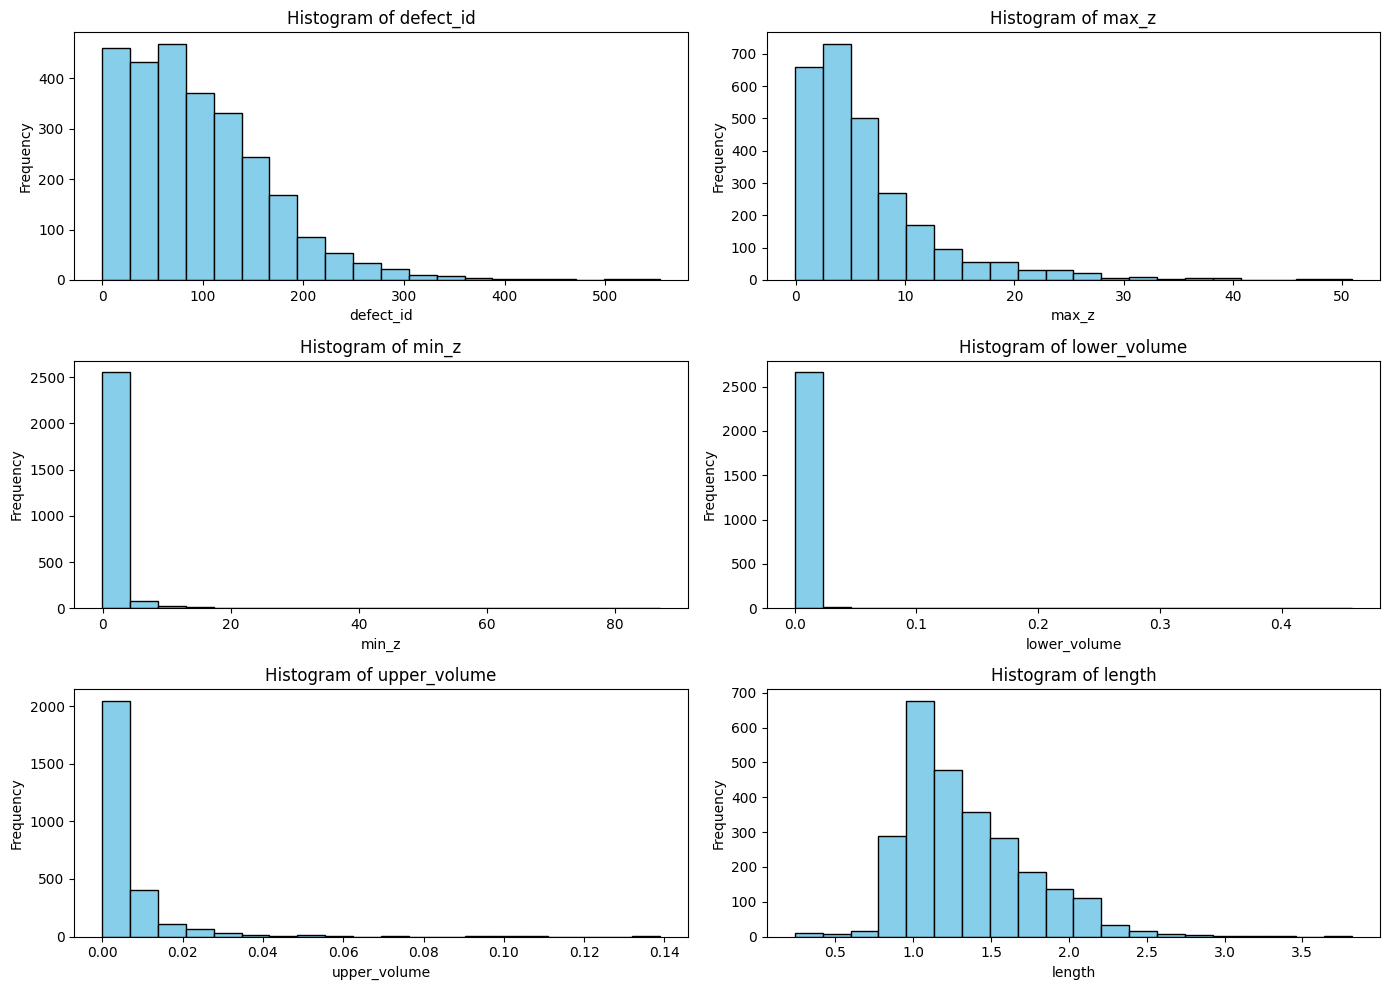

In [4]:
import matplotlib.pyplot as plt

# Creating histograms for selected variables
def plot_histograms(data):
    fig, axs = plt.subplots(3, 2, figsize=(14, 10))

    # List of columns to plot
    columns_to_plot = ['defect_id', 'max_z', 'min_z', 'lower_volume', 'upper_volume', 'length']
    axs = axs.ravel()  # Flatten the array of axes

    for i, col in enumerate(columns_to_plot):
        axs[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(f'Histogram of {col}', fontsize=12)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot histograms using the defined function
plot_histograms(data)





Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 33.

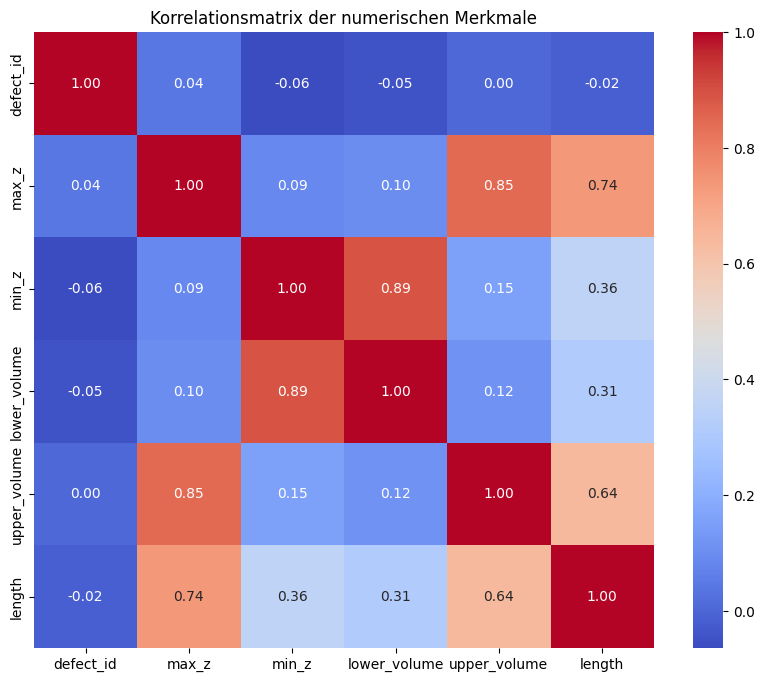

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl nur der numerischen Spalten für die Korrelationsmatrix
numeric_data = data.select_dtypes(include=[np.number])
# Entfernen von konstanten Spalten (d.h. Spalten, die nur einen einzigen Wert enthalten)
numeric_data = numeric_data.loc[:, (numeric_data != numeric_data.iloc[0]).any()]

# Berechnen der Korrelationsmatrix für numerische Daten
correlation_matrix = numeric_data.corr()

# Erstellen der Heatmap für die Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationsmatrix der numerischen Merkmale')
plt.show()


Quelle: ChatGPT, OpenAI, https://www.openai.com/

 ### 2.2 Umgang mit fehlenden Daten

In [6]:
# Überprüfen ob es fehlende Daten gibt
missing_data = data.isnull().sum()

# Der Anzahl der fehlenden Daten pro Spalte anzeigen
print("Fehlende Daten pro Spalte:")
print(missing_data)

# Summe der fehlenden Daten im gesamten DataFrame
total_missing = missing_data.sum()
print("\nGesamtanzahl der fehlenden Daten im DataFrame:", total_missing)

Fehlende Daten pro Spalte:
trial               0
defect_id           0
defect_category     0
status              0
max_z              43
min_z              10
lower_volume       10
upper_volume       10
length             72
paint_color         0
defect_severity     0
dtype: int64

Gesamtanzahl der fehlenden Daten im DataFrame: 145


Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 36.

In [7]:
from sklearn.impute import SimpleImputer

# Erstellen eines Imputers, der den Median für fehlende Werte verwendet
imputer = SimpleImputer(strategy='median')

# Wende den Imputer auf die notwendigen Spalten an
data[['lower_volume', 'upper_volume', 'length', 'max_z', 'min_z']] = imputer.fit_transform(data[['lower_volume', 'upper_volume', 'length', 'max_z', 'min_z']])

# Sicherstellen, dass die Daten richtig gespeichert oder weiterverwendet werden
data_imputed = data.copy()  # Optional: Speichern der imputierten Daten in einer neuen Variable

# Überprüfen, ob noch fehlende Werte vorhanden sind
print("Fehlende Daten pro Spalte nach Imputation:")
print(data_imputed.isnull().sum())

# Weiterverarbeitung oder Modelltraining mit `data_imputed`



Fehlende Daten pro Spalte nach Imputation:
trial              0
defect_id          0
defect_category    0
status             0
max_z              0
min_z              0
lower_volume       0
upper_volume       0
length             0
paint_color        0
defect_severity    0
dtype: int64


Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 41.

In [8]:
print("Eine Übersicht, wie oft der Wert 'Unknown' in den Spalten auftritt: ")
data.apply(lambda col: col.value_counts().get("unknown", 0))


Eine Übersicht, wie oft der Wert 'Unknown' in den Spalten auftritt: 


trial              0
defect_id          0
defect_category    0
status             0
max_z              0
min_z              0
lower_volume       0
upper_volume       0
length             0
paint_color        0
defect_severity    0
dtype: int64

Es gibt keine unbekannten Werte

Quelle: ChatGPT, OpenAI, https://www.openai.com/

### 2.3 Umgang mit Ausreißern

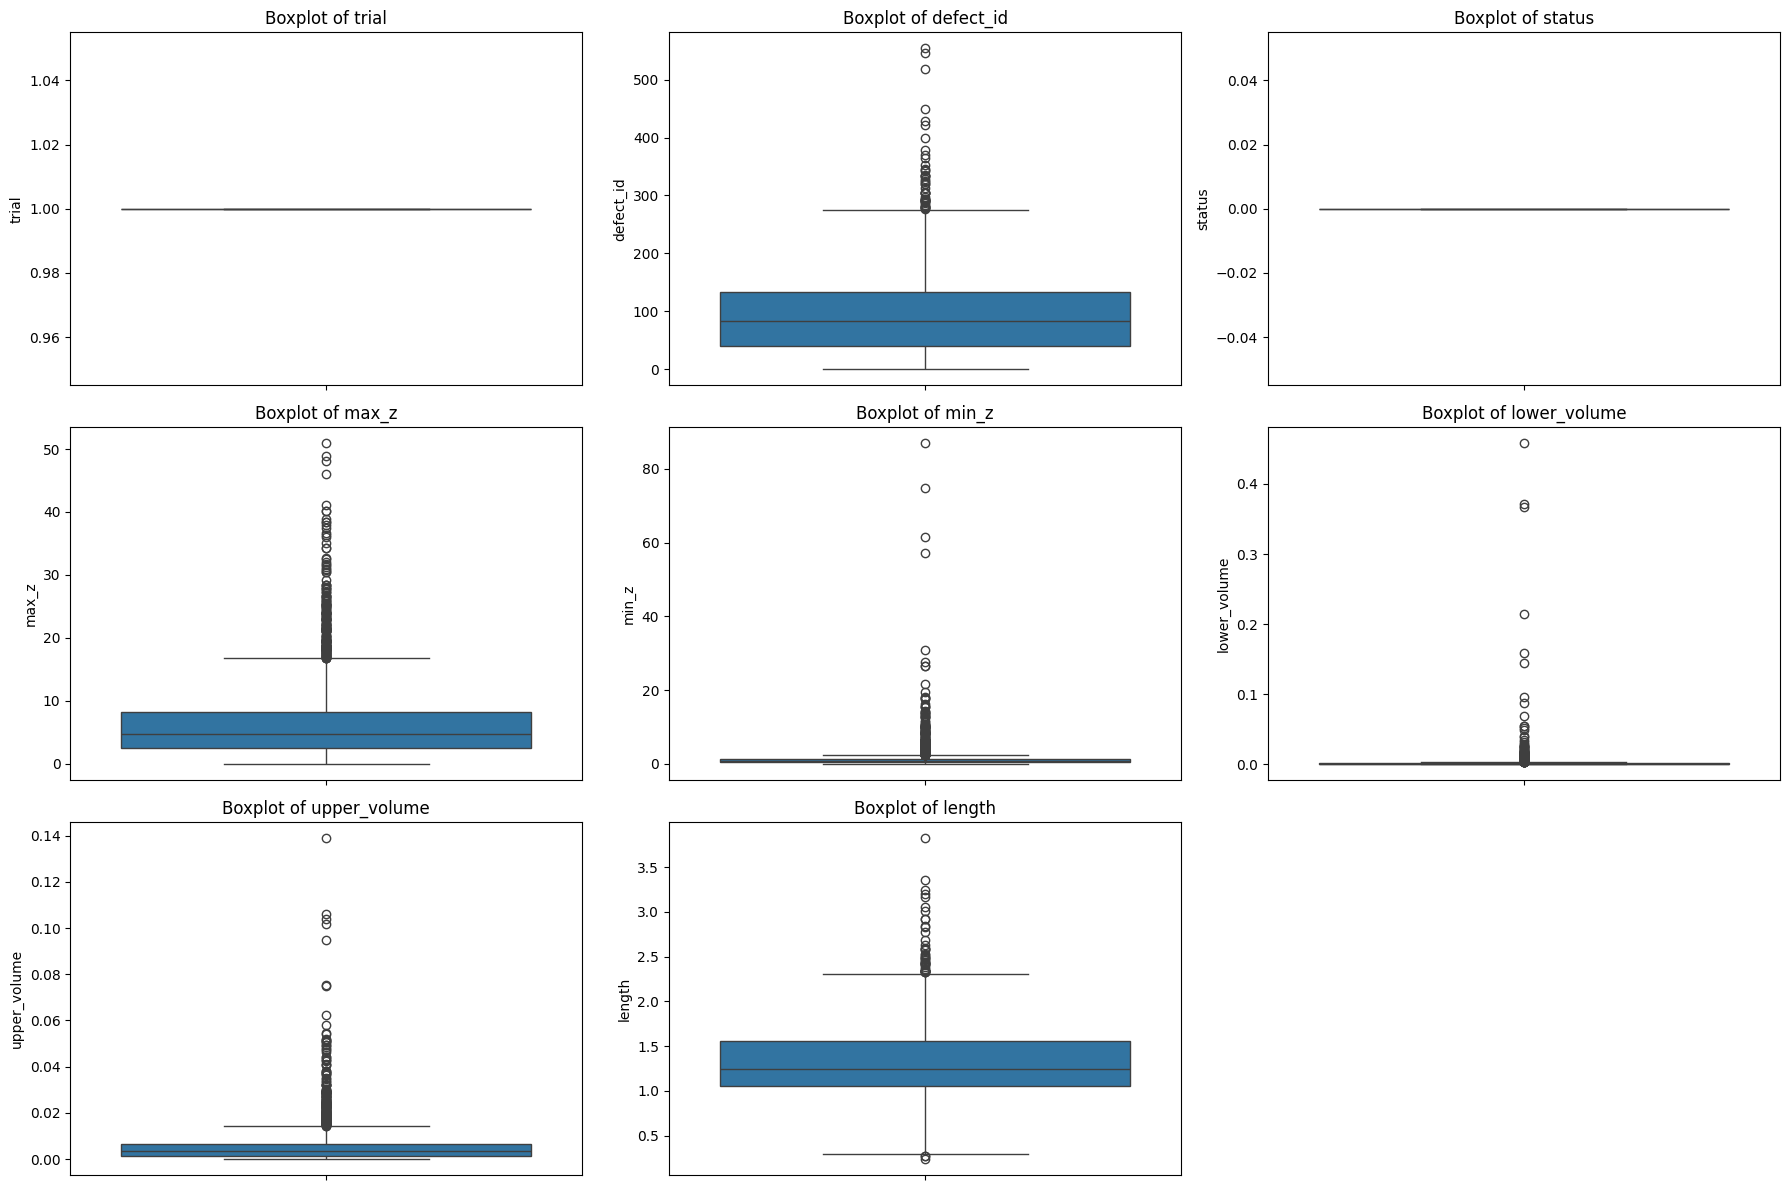

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bestimmen Sie die Anzahl der Spalten für die Boxplot-Matrix
cols = 3  # oder eine andere Anzahl, die zu Ihrer Bildschirmgröße passt

# Auswahl nur der numerischen Spalten für die Boxplots
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_cols)
num_rows = num_plots // cols + (num_plots % cols > 0)

# Erstellen der Boxplots in einer Matrixanordnung
plt.figure(figsize=(cols * 6, num_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 49.

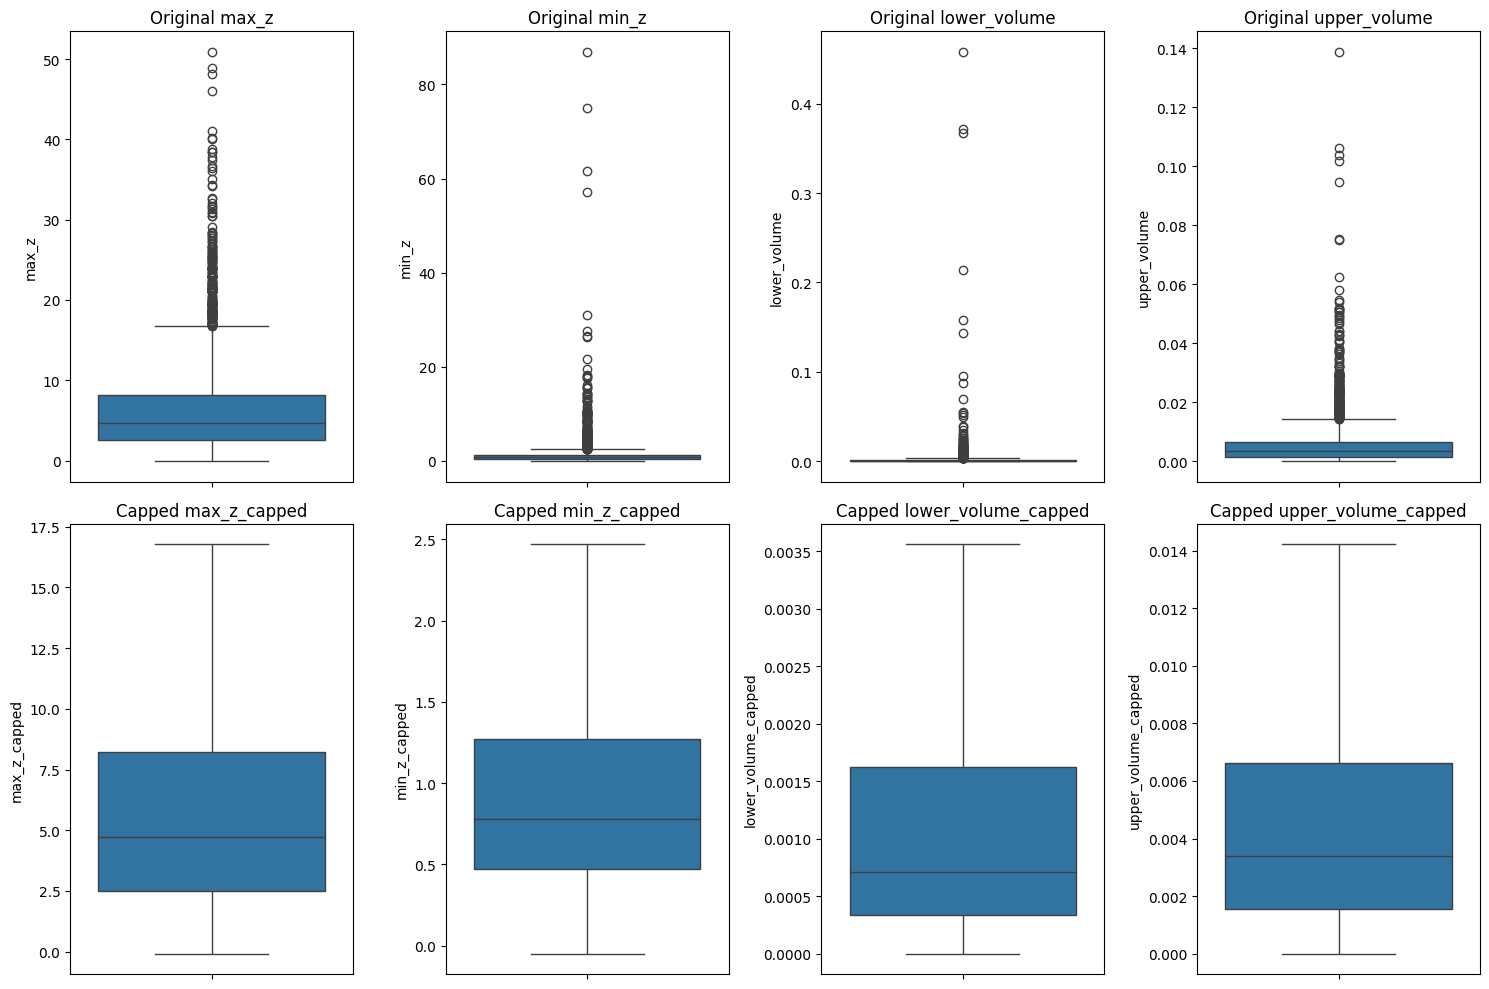

In [10]:
# Berechnung der IQR-Grenzen und Capping für jede Variable
for col in ['max_z', 'min_z', 'lower_volume', 'upper_volume']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col + '_capped'] = data[col].clip(lower_bound, upper_bound)

# Erstellen von Boxplots für die Original- und gecappten Variablen
capped_columns = ['max_z_capped', 'min_z_capped', 'lower_volume_capped', 'upper_volume_capped']
original_columns = ['max_z', 'min_z', 'lower_volume', 'upper_volume']

plt.figure(figsize=(15, 10))

for i, col in enumerate(original_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=data[col])
    plt.title(f'Original {col}')

for i, col in enumerate(capped_columns):
    plt.subplot(2, 4, i + 5)
    sns.boxplot(data=data[col])
    plt.title(f'Capped {col}')

plt.tight_layout()
plt.show()




Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 50.

### 2.4 Überprüfung auf Datenfehler

In [11]:
features = data.columns
for feature in features: 
    print(f'{feature}: {data[feature].dtype}')
    print(data[feature].unique())
    print()

trial: int64
[1]

defect_id: int64
[ 20 142  98  13  57  40 136 329 157  11  23  28  65  88 118 113  30  44
 172  63  22 121  46  91 192 258 187  82 148  43 112 159 129 114  76  64
 228 101  99  72   7  33  95  59  37 133  69 108 138  38 111  35 266 164
 107  61  74  87 251  56 151 170  51  29  48  70  41  81  62 248 246   4
  75 125 109 225 119 134  10 117  27  26  15  32 160 146 156   8 153  17
 175  93   1 167   9 183  45  67  36 122 203 145  39  42 231 163 169  58
 289 126   5 123 265  96 124 202  16 209  47  86 237  52   3  14  94 115
  89  83 143 103 120  50 155 186 104 177 224  54 116 132 154 131 150 194
 106  77  21 218 235 193 449 176 217  34 216 165 259 149 130  19  60  79
 195 188 263 173 345 144   0 174 197  73  18  97 179 280  68 137 205 206
  78 267  71  53 135 219  92 147 141  66  24 100 171 128 139 234 184 200
 127  90 166 255 198  12 182 110   6 292  85 279 214 178  31 319  25  49
 223 161 333 199  80 102 305 230 240 226 181 399 191 185 221  84  55 105
 249 162 140 208

Quelle: ChatGPT, OpenAI, https://www.openai.com/

### 2.5 Überprüfung und Bereinigung von Duplikaten

In [12]:
# Vor dem Entfernen auf Duplikate prüfen
duplicates_before = data.duplicated().sum()

# Duplikate entfernen
data_cleaned = data.drop_duplicates()

# Nach dem Entfernen auf Duplikate prüfen
duplicates_after = data_cleaned.duplicated().sum()

duplicates_before, duplicates_after

(32, 0)

 In den Datensatz gab es vor der Bereinigung 32 Duplikate, und nach dem Entfernen potenzieller Duplikate sind keine mehr Duplikate vorhanden. ​​

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_1, Teil des Kurses "Applied Machine Learning", Seite 45,46.

### 2.6 Daten standardisieren und transformieren

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Daten laden
data = pd.read_csv("defect_data.csv")

# Definieren der kategorischen Spalten für OneHotEncoding
categorical_features = ['paint_color', 'defect_category', 'defect_severity']  # Erweitern um 'defect_severity'

# Numerische Spalten, die skaliert und transformiert werden sollen
numeric_features = ['max_z', 'min_z', 'lower_volume', 'upper_volume', 'length']

# Erstellen des Preprocessors für kategorische und numerische Daten
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # OneHotEncoder für kategorische Daten
        ('num', Pipeline([('scaler', StandardScaler()), ('power_transform', PowerTransformer(method='yeo-johnson'))]), numeric_features)  # Pipeline für numerische Daten
    ],
    remainder='passthrough'  # Nicht spezifizierte Spalten unverändert lassen
)

# Anwenden der Pipeline auf die Daten
data_transformed = preprocessor.fit_transform(data)

# Neue Spaltennamen nach der Transformation
new_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_columns = list(new_columns) + numeric_features + [col for col in data.columns if col not in categorical_features + numeric_features]

# Neuen DataFrame erstellen
data = pd.DataFrame(data_transformed, columns=new_columns)

# DataFrame anzeigen
print(data.head())


   paint_color_B  defect_category_Other  defect_category_category_1  \
0            1.0                    0.0                         1.0   
1            1.0                    0.0                         1.0   
2            1.0                    0.0                         1.0   
3            1.0                    0.0                         0.0   
4            1.0                    0.0                         0.0   

   defect_category_category_2  defect_category_category_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   defect_category_category_4  defect_category_category_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                      

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_2, Teil des Kurses "Applied Machine Learning", Seite 12,15.

#### 2.7 Feature Selection und Extraktion

In [14]:
mask = ((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (
    correlation_matrix.abs() != 1
)
correlations = correlation_matrix[mask].abs().stack().dropna()
correlations




max_z         upper_volume    0.849079
              length          0.737271
min_z         lower_volume    0.890500
lower_volume  min_z           0.890500
upper_volume  max_z           0.849079
              length          0.641054
length        max_z           0.737271
              upper_volume    0.641054
dtype: float64

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_2, Teil des Kurses "Applied Machine Learning", Seite 36,37,45.

In [15]:
# Festlegen eines Schwellenwertes für hohe Korrelation
high_correlation_threshold = 0.8

# Finden der Paare von Features mit hoher Korrelation
correlated_pairs = correlations[correlations > high_correlation_threshold].index.tolist()

# Auswahl der zu entfernenden Features
features_to_remove = set()
for feature1, feature2 in correlated_pairs:
    features_to_remove.add(feature2)

# Entfernen der ausgewählten Features aus dem Datensatz
data = data.drop(columns=list(features_to_remove))

# Jetzt haben wir einen Datensatz mit weniger redundanten Features




Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_2, Teil des Kurses "Applied Machine Learning", Seite 34,36,45.

#### 2.8 Zusammenführung, Modifikation und Aufteilung der Zielvariablen

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Beispiel-Daten (ersetze dies durch deine eigenen Daten)
# data = pd.read_csv('your_dataset.csv')

# Anzeigen der vorhandenen Spaltennamen zur Überprüfung
print("Spalten im Datensatz vor der Modifikation:", data.columns)

# Überprüfen, ob die Spalten existieren
irreparable_col = 'defect_severity_irreparable'
not_repairable_col = 'defect_severity_not repairable'

if irreparable_col in data.columns and not_repairable_col in data.columns:
    # Kombinieren der Werte von 'defect_severity_not repairable' in 'defect_severity_irreparable'
    data[irreparable_col] = data[irreparable_col] + data[not_repairable_col]
    data[irreparable_col] = data[irreparable_col].apply(lambda x: 1 if x > 0 else 0)

    # Löschen der Spalte 'defect_severity_not repairable'
    data.drop(columns=[not_repairable_col], inplace=True)

# Zielvariablen
target_columns = [irreparable_col, 'defect_severity_medium', 'defect_severity_small']
# Alle anderen Spalten außer den Zielvariablen werden als Eingabemerkmale verwendet
feature_columns = data.columns.difference(target_columns)

# Trainings- und Ziel-Daten vorbereiten
X = data[feature_columns]
y = data[target_columns]

# Aufteilen des Datensatzes in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Überprüfen der Größen der aufgeteilten Datensätze zur Sicherheit
print("Trainingsdaten Größe:", X_train.shape)
print("Testdaten Größe:", X_test.shape)

# Überprüfen der Spaltenanzahl nach dem Zusammenführen und Löschen
print("Anzahl der Spalten nach dem Zusammenführen und Löschen:", data.shape[1])
print("Spalten im Datensatz nach der Modifikation:", data.columns)


Spalten im Datensatz vor der Modifikation: Index(['paint_color_B', 'defect_category_Other', 'defect_category_category_1',
       'defect_category_category_2', 'defect_category_category_3',
       'defect_category_category_4', 'defect_category_category_5',
       'defect_severity_irreparable', 'defect_severity_medium',
       'defect_severity_not repairable', 'defect_severity_small', 'length',
       'trial', 'defect_id', 'status'],
      dtype='object')
Trainingsdaten Größe: (2154, 11)
Testdaten Größe: (539, 11)
Anzahl der Spalten nach dem Zusammenführen und Löschen: 14
Spalten im Datensatz nach der Modifikation: Index(['paint_color_B', 'defect_category_Other', 'defect_category_category_1',
       'defect_category_category_2', 'defect_category_category_3',
       'defect_category_category_4', 'defect_category_category_5',
       'defect_severity_irreparable', 'defect_severity_medium',
       'defect_severity_small', 'length', 'trial', 'defect_id', 'status'],
      dtype='object')


Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_2_2, Teil des Kurses "Applied Machine Learning", Seite 23.

## 3. Modellierung & Evaluation

## 3.1 Übersicht über Modelle, Loss-Funktionen und Bewertungsmetriken

In der folgenden Tabelle sind die Modelle, ihre typischen Anwendungsbereiche, die verwendeten Loss-Funktionen und die relevanten Bewertungsmetriken zusammengefasst, die für die Vorhersage von Produktionsdefekten verwendet werden.

### Modelle und ihre Eigenschaften

| Modell                 | Beschreibung                                                                                                                                                                      | Loss-Funktion                 | Aktivierungsfunktion           | Metriken                        |
|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------|---------------------------------|---------------------------------|
| **Decision Tree**      | Ein Modell, das Entscheidungen basierend auf den Eingabevariablen trifft, indem es eine Baumstruktur verwendet. Interpretierbar und leicht zu visualisieren.                      | Hinge Loss                    | -                               | Accuracy, Precision, Recall, F1 |
| **Support Vector Machine (SVM)** | Ein Modell, das eine Hyperplane findet, die die Datenpunkte der verschiedenen Klassen am besten trennt. Besonders effektiv bei hochdimensionalen Daten.                | Hinge Loss                    | -                               | Accuracy, Precision, Recall, F1 |
| **Deep Learning**      | Ein Modell, das künstliche neuronale Netzwerke mit vielen Schichten verwendet, um komplexe Muster in großen Datenmengen zu lernen.                                                 | Binary Cross-Entropy Loss     | ReLU (versteckte Schichten)     | Accuracy, Precision, Recall, F1 |
|                        |                                                                                                                                                                                  |                               | Sigmoid (Ausgabeschicht)        |                                 |


### Bewertungsmetriken

- **Accuracy**: Prozentsatz der Gesamtzahl der korrekten Vorhersagen.
- **Precision**: Prozentsatz der positiven Identifikationen, die tatsächlich korrekt waren.
- **Recall (Sensitivität)**: Prozentsatz der tatsächlichen Positiven, die korrekt identifiziert wurden.
- **F1-Score**: Harmonisches Mittel von Precisionterscheiden.

Diese Informationen bieten eine solide Grundlage für das Verständnis der Stärken und Einschränkungen jedes Modells in Bezug auf das spezifische Problem der Defekterkennung.



Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_7_Model_Evaluation, Teil des Kurses "Applied Machine Learning", Seite 28,29,30. 

#### 3.2 Modell Training 

#### I. Decision Tree

In [18]:
import pandas as pd
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
from mlflow import sklearn as mlflow_sklearn

# Decision Tree Model
mlflow.start_run(run_name="MultiOutput Decision Tree Classifier")
try:
    dt_model = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))
    dt_params = {"classifier": "DecisionTree", "random_state": 42}
    mlflow.log_params(dt_params)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    dt_precision = precision_score(y_test, dt_pred, average='weighted')
    dt_recall = recall_score(y_test, dt_pred, average='weighted')
    dt_f1 = f1_score(y_test, dt_pred, average='weighted')
    mlflow.log_metric("accuracy", dt_accuracy)
    mlflow.log_metric("precision", dt_precision)
    mlflow.log_metric("recall", dt_recall)
    mlflow.log_metric("f1_score", dt_f1)
    mlflow_sklearn.log_model(dt_model, "dt_model")
finally:
    mlflow.end_run()

# Ergebnisse in einem DataFrame sammeln
dt_results_df = pd.DataFrame({
    "Accuracy": [dt_accuracy],
    "Precision": [dt_precision],
    "Recall": [dt_recall],
    "F1 Score": [dt_f1]
})

# Ausgabe der Ergebnisse in einer Tabelle
print("Bewertungsergebnisse - Decision Tree:")
print(tabulate(dt_results_df, headers='keys', tablefmt='pipe', showindex=False))



Bewertungsergebnisse - Decision Tree:
|   Accuracy |   Precision |   Recall |   F1 Score |
|-----------:|------------:|---------:|-----------:|
|   0.747681 |    0.798811 | 0.792208 |   0.794903 |


Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_8_Model_selection, Teil des Kurses "Applied Machine Learning", Seite 21.

#### II. Supoort Vector Machine

In [19]:
import pandas as pd
from tabulate import tabulate
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
from mlflow import sklearn as mlflow_sklearn

# SVM Model
mlflow.start_run(run_name="MultiOutput SVM Classifier")
try:
    svm_model = MultiOutputClassifier(SVC(kernel='linear', random_state=42))
    svm_params = {"classifier": "SVM", "kernel": "linear", "random_state": 42}
    mlflow.log_params(svm_params)
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_pred)
    svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=0)
    svm_recall = recall_score(y_test, svm_pred, average='weighted')
    svm_f1 = f1_score(y_test, svm_pred, average='weighted')
    mlflow.log_metric("accuracy", svm_accuracy)
    mlflow.log_metric("precision", svm_precision)
    mlflow.log_metric("recall", svm_recall)
    mlflow.log_metric("f1_score", svm_f1)
    mlflow_sklearn.log_model(svm_model, "svm_model")
finally:
    mlflow.end_run()

# Ergebnisse in einem DataFrame sammeln
svm_results_df = pd.DataFrame({
    "Accuracy": [svm_accuracy],
    "Precision": [svm_precision],
    "Recall": [svm_recall],
    "F1 Score": [svm_f1]
})

# Ausgabe der Ergebnisse in einer Tabelle
print("Bewertungsergebnisse - SVM:")
print(tabulate(svm_results_df, headers='keys', tablefmt='pipe', showindex=False))



Bewertungsergebnisse - SVM:
|   Accuracy |   Precision |   Recall |   F1 Score |
|-----------:|------------:|---------:|-----------:|
|   0.773655 |    0.786154 | 0.773655 |   0.762839 |


Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_8_Model_selection, Teil des Kurses "Applied Machine Learning", Seite 21.

#### III. Deep Learning

In [20]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='absl')  # Ignoriert spezifische Warnungen

import pandas as pd
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
import logging
import matplotlib.pyplot as plt

# Set the logging level to ERROR to suppress warnings
logging.getLogger("mlflow").setLevel(logging.ERROR)

# Additional suppression for TensorFlow warnings
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# Function to ignore specific absl warnings
def ignore_absl_warning(*args, **kwargs):
    pass

import absl.logging
absl.logging.warning = ignore_absl_warning

# Initialize MLflow
mlflow.start_run(run_name="Deep Learning Model")
mlflow.tensorflow.autolog()  # Automatisches Logging der Metriken, Modelle und Parameter

# Beispiel-Daten (ersetze dies durch deine eigenen Daten)
# X_train, y_train, X_test, y_test

# Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modellerstellung
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Annahme: y_train.shape[1] existiert
])

# Modell kompilieren
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modell trainieren und das Trainingsergebnis speichern
history = dl_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Vorhersagen treffen
y_pred_dl = dl_model.predict(X_test_scaled)
y_pred_dl = (y_pred_dl > 0.5).astype(int)  # Umwandlung der Wahrscheinlichkeiten in binäre Werte

# Berechnung der Metriken
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')
f1_dl = f1_score(y_test, y_pred_dl, average='weighted')

# Ergebnisse in einem DataFrame sammeln
results_df_dl = pd.DataFrame({
    "Accuracy": [accuracy_dl],
    "Precision": [precision_dl],
    "Recall": [recall_dl],
    "F1 Score": [f1_dl]
})

# Ausgabe der Ergebnisse in einer Tabelle
print("Bewertungsergebnisse - Deep Learning (Neuronales Netzwerk):")
print(tabulate(results_df_dl, headers='keys', tablefmt='pipe', showindex=False))


C:\Users\aslih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 - 3s - 54ms/step - accuracy: 0.7655 - loss: 0.4868 - val_accuracy: 0.8306 - val_loss: 0.2950
Epoch 2/100
54/54 - 0s - 5ms/step - accuracy: 0.8363 - loss: 0.2757 - val_accuracy: 0.8794 - val_loss: 0.2270
Epoch 3/100
54/54 - 0s - 5ms/step - accuracy: 0.8595 - loss: 0.2435 - val_accuracy: 0.8794 - val_loss: 0.2140
Epoch 4/100
54/54 - 0s - 5ms/step - accuracy: 0.8630 - loss: 0.2356 - val_accuracy: 0.8840 - val_loss: 0.2125
Epoch 5/100
54/54 - 0s - 5ms/step - accuracy: 0.8619 - loss: 0.2311 - val_accuracy: 0.8840 - val_loss: 0.2064
Epoch 6/100
54/54 - 0s - 5ms/step - accuracy: 0.8694 - loss: 0.2280 - val_accuracy: 0.8933 - val_loss: 0.2033
Epoch 7/100
54/54 - 0s - 5ms/step - accuracy: 0.8706 - loss: 0.2263 - val_accuracy: 0.8886 - val_loss: 0.2003
Epoch 8/100
54/54 - 0s - 5ms/step - accuracy: 0.8746 - loss: 0.2273 - val_accuracy: 0.8933 - val_loss: 0.2071
Epoch 9/100
54/54 - 0s - 5ms/step - accuracy: 0.8735 - loss: 0.2231 - val_accuracy: 0.8933 - val_loss: 0.1993
Epoch 10/

Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_8_Model_selection, Teil des Kurses "Applied Machine Learning", Seite 21.

### IV. Vergleich der Modelle 

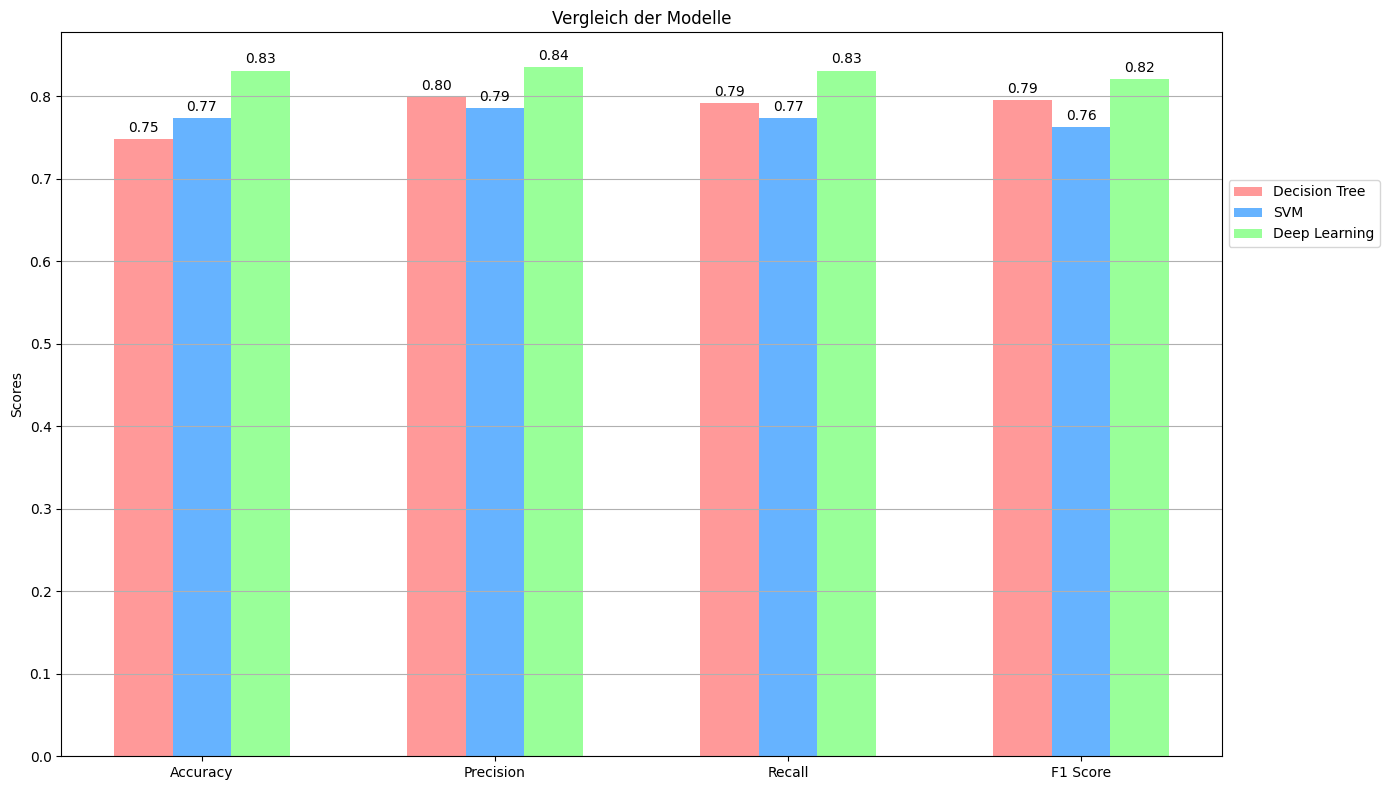

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Metriken
metrics = {
    "Decision Tree": [0.747681, 0.798811, 0.792208, 0.794903],
    "SVM": [0.773655, 0.786154, 0.773655, 0.762839],
    "Deep Learning": [0.831169, 0.835719, 0.831169, 0.820978]
}

labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(labels))  # Die Label-Positionen
width = 0.2  # Die Breite der Balken

fig, ax = plt.subplots(figsize=(14, 8))

# Farben für die Balken
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Balken hinzufügen
rects1 = ax.bar(x - width, metrics["Decision Tree"], width, label='Decision Tree', color=colors[0])
rects2 = ax.bar(x, metrics["SVM"], width, label='SVM', color=colors[1])
rects3 = ax.bar(x + width, metrics["Deep Learning"], width, label='Deep Learning', color=colors[2])

# Labels, Titel und Legende hinzufügen
ax.set_ylabel('Scores')
ax.set_title('Vergleich der Modelle')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))

# Gitternetz hinzufügen
ax.yaxis.grid(True)

# Balkenbeschriftung
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

# Diagramm anzeigen
plt.show()


Quelle: ChatGPT, OpenAI, https://www.openai.com/

### 3.3 Überpüfen auf Over- und Underfitting

#### I.Decision Tree

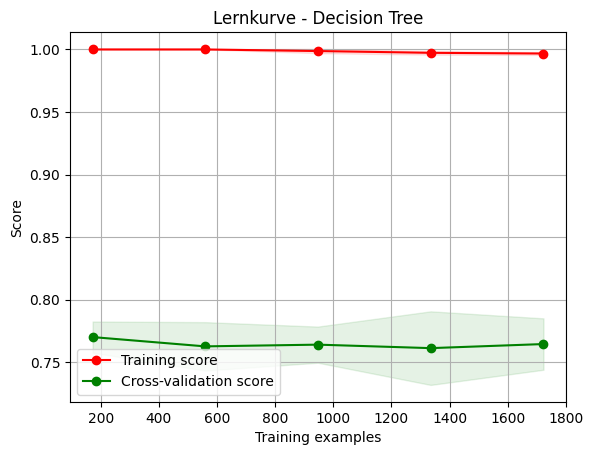

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plotting the learning curve for the Decision Tree
plot_learning_curve(MultiOutputClassifier(DecisionTreeClassifier(random_state=42)), "Lernkurve - Decision Tree", X_train, y_train, cv=5)
plt.show()


Quelle: ChatGPT, OpenAI, https://www.openai.com/

#### II.Support Vector Machine

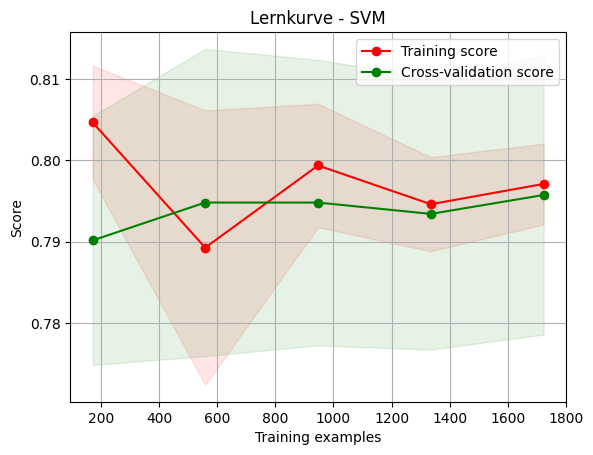

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plotting the learning curve for the SVM
plot_learning_curve(MultiOutputClassifier(SVC(kernel='linear', random_state=42)), "Lernkurve - SVM", X_train, y_train, cv=5)
plt.show()


Quelle: ChatGPT, OpenAI, https://www.openai.com/

#### III. Deep Learning

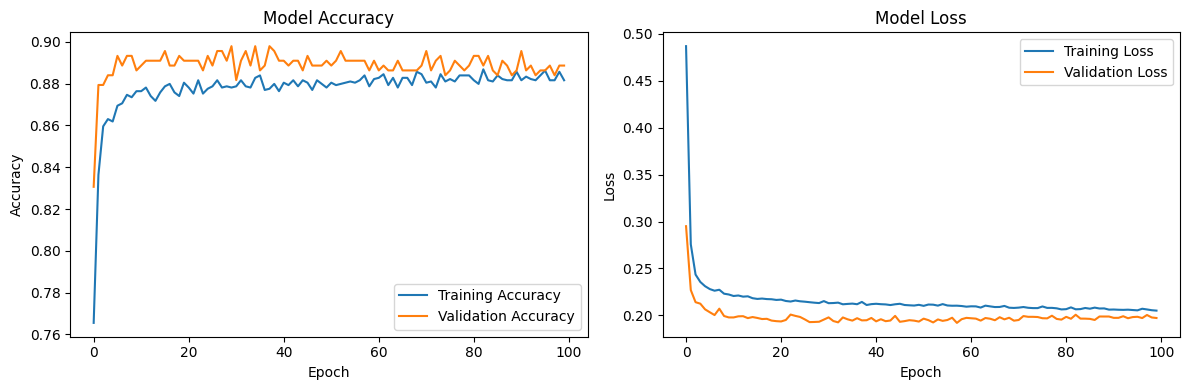

In [24]:
# Lernkurven zeichnen
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# MLflow Run beenden
mlflow.end_run()


Quelle: ChatGPT, OpenAI, https://www.openai.com/

#### 3.4 Ensemble

In [25]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings

# Warnungen ignorieren
warnings.filterwarnings('ignore')

# Stellen Sie sicher, dass y_train_np ein Numpy-Array ist
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.DataFrame) else y_train

# Anzahl der Dimensionen in der Zielvariablen
num_dimensions = y_train_np.shape[1]

# Skalierung der Testdaten für das Deep Learning Modell
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Angenommen, die Modelle sind bereits trainierte und vorhandene Objekte im Speicher
# dt_model, svm_model, dl_model

# Vorhersagen für jede Dimension separat
y_pred = np.zeros((len(X_test), num_dimensions))

for dimension in range(num_dimensions):
    # Vorhersagen der Einzelmodelle
    dt_pred = dt_model.predict(X_test)
    svm_pred = svm_model.predict(X_test)
    dl_pred = (dl_model.predict(X_test_scaled) > 0.5).astype(int)[:, dimension]
    
    # Mehrheitsklasse aus den Vorhersagen wählen
    ensemble_pred = np.round((dt_pred[:, dimension] + svm_pred[:, dimension] + dl_pred) / 3).astype(int)
    
    y_pred[:, dimension] = ensemble_pred

# Berechnen der Metriken
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# In eine DataFrame Tabelle umwandeln
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Anzeigen der Tabelle
print("Evaluation Results - Ensemble Model:")
print(tabulate(metrics_df, headers='keys', tablefmt='pipe', showindex=False))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
Evaluation Results - Ensemble Model:
| Metric    |    Value |
|:----------|---------:|
| Accuracy  | 0.80705  |
| Precision | 0.831297 |
| Recall    | 0.808905 |
| F1-Score  | 0.807968 |


Quelle: ChatGPT, OpenAI, https://www.openai.com/

### 4. Optimierung mit Optuna 

In [27]:
import optuna
import mlflow
import mlflow.sklearn
import mlflow.tensorflow
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tabulate import tabulate

# Annahme: X_train, X_test, y_train, y_test sind bereits definiert und vorbereitet

# Optimierung für Decision Tree
def optimize_decision_tree(trial):
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 64)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 64)
    classifier = MultiOutputClassifier(DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42))
    score = cross_val_score(classifier, X_train, y_train, n_jobs=1, cv=3, scoring='accuracy').mean()  # n_jobs auf 1 gesetzt
    return score

# Optimierung für SVM
def optimize_svm(trial):
    svc_c = trial.suggest_loguniform('svc_c', 1e-3, 1e3)
    svc_kernel = trial.suggest_categorical('svc_kernel', ['linear', 'poly', 'rbf'])
    svc_gamma = trial.suggest_loguniform('svc_gamma', 1e-4, 1e1)
    classifier = MultiOutputClassifier(SVC(C=svc_c, kernel=svc_kernel, gamma=svc_gamma, random_state=42))
    score = cross_val_score(classifier, X_train, y_train, n_jobs=1, cv=3, scoring='accuracy').mean()  # n_jobs auf 1 gesetzt
    return score

# Optimierung für Deep Learning
def optimize_deep_learning(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_units = trial.suggest_int('num_units', 32, 256)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    
    model = Sequential()
    model.add(Dense(num_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(num_units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Erstellen und Optimieren der Studien
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(optimize_decision_tree, n_trials=10)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(optimize_svm, n_trials=10)

study_dl = optuna.create_study(direction='maximize')
study_dl.optimize(optimize_deep_learning, n_trials=10)

# Ergebnisse anzeigen
print("Beste Hyperparameter für Decision Tree:", study_dt.best_params)
print("Beste Hyperparameter für SVM:", study_svm.best_params)
print("Beste Hyperparameter für Deep Learning:", study_dl.best_params)

# Training der besten Modelle und Auswertung

# Decision Tree
best_dt_params = study_dt.best_params
best_dt_model = MultiOutputClassifier(DecisionTreeClassifier(
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    min_samples_leaf=best_dt_params['min_samples_leaf'],
    random_state=42
))
best_dt_model.fit(X_train, y_train)
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# SVM
best_svm_params = study_svm.best_params
best_svm_model = MultiOutputClassifier(SVC(
    C=best_svm_params['svc_c'], 
    kernel=best_svm_params['svc_kernel'], 
    gamma=best_svm_params['svc_gamma'], 
    random_state=42
))
best_svm_model.fit(X_train, y_train)
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Deep Learning
best_dl_params = study_dl.best_params
num_layers = best_dl_params['num_layers']
num_units = best_dl_params['num_units']
dropout_rate = best_dl_params['dropout_rate']

best_dl_model = Sequential()
best_dl_model.add(Dense(num_units, activation='relu', input_shape=(X_train.shape[1],)))
best_dl_model.add(Dropout(dropout_rate))
for _ in range(num_layers - 1):
    best_dl_model.add(Dense(num_units, activation='relu'))
    best_dl_model.add(Dropout(dropout_rate))
best_dl_model.add(Dense(y_train.shape[1], activation='sigmoid'))

best_dl_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = best_dl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])
y_pred_dl = best_dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5).astype(int)
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')
f1_dl = f1_score(y_test, y_pred_dl, average='weighted')

# Metriken in tabellarischer Form ausgeben
metrics = [
    ["Accuracy", accuracy_dt, accuracy_svm, accuracy_dl],
    ["Precision", precision_dt, precision_svm, precision_dl],
    ["Recall", recall_dt, recall_svm, recall_dl],
    ["F1 Score", f1_dt, f1_svm, f1_dl]
]

print(tabulate(metrics, headers=["Metric", "Decision Tree", "SVM", "Deep Learning"], tablefmt="pipe"))

# Optional: Ergebnisse mit mlflow protokollieren
mlflow.start_run(run_name="Best Models from Optuna")
mlflow.log_params({"decision_tree": best_dt_params, "svm": best_svm_params, "deep_learning": best_dl_params})
mlflow.log_metrics({
    "accuracy_dt": accuracy_dt, "precision_dt": precision_dt, "recall_dt": recall_dt, "f1_dt": f1_dt,
    "accuracy_svm": accuracy_svm, "precision_svm": precision_svm, "recall_svm": recall_svm, "f1_svm": f1_svm,
    "accuracy_dl": accuracy_dl, "precision_dl": precision_dl, "recall_dl": recall_dl, "f1_dl": f1_dl
})
mlflow.sklearn.log_model(best_dt_model, "best_dt_model")
mlflow.sklearn.log_model(best_svm_model, "best_svm_model")
mlflow.tensorflow.log_model(best_dl_model, "best_dl_model")
mlflow.end_run()


[I 2024-05-31 17:24:43,147] A new study created in memory with name: no-name-1690f9ca-a3b9-4645-83a1-fd104656abe2
[I 2024-05-31 17:24:43,209] Trial 0 finished with value: 0.8607242339832869 and parameters: {'max_depth': 3, 'min_samples_split': 33, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8607242339832869.
[I 2024-05-31 17:24:43,272] Trial 1 finished with value: 0.850974930362117 and parameters: {'max_depth': 14, 'min_samples_split': 62, 'min_samples_leaf': 29}. Best is trial 0 with value: 0.8607242339832869.
[I 2024-05-31 17:24:43,318] Trial 2 finished with value: 0.8119777158774374 and parameters: {'max_depth': 2, 'min_samples_split': 50, 'min_samples_leaf': 54}. Best is trial 0 with value: 0.8607242339832869.
[I 2024-05-31 17:24:43,365] Trial 3 finished with value: 0.8440111420612814 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 43}. Best is trial 0 with value: 0.8607242339832869.
[I 2024-05-31 17:24:43,412] Trial 4 finished with value: 0.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2024-05-31 18:24:33,584] Trial 0 finished with value: 0.7829313543599258 and parameters: {'num_layers': 2, 'num_units': 85, 'dropout_rate': 0.4154118893391286}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-05-31 18:24:52,278] Trial 1 finished with value: 0.7699443413729128 and parameters: {'num_layers': 2, 'num_units': 68, 'dropout_rate': 0.4798094930300697}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2024-05-31 18:25:07,605] Trial 2 finished with value: 0.7755102040816326 and parameters: {'num_layers': 2, 'num_units': 121, 'dropout_rate': 0.05116325267271338}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-05-31 18:25:24,179] Trial 3 finished with value: 0.7662337662337663 and parameters: {'num_layers': 2, 'num_units': 255, 'dropout_rate': 0.02945163194165218}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-05-31 18:25:47,525] Trial 4 finished with value: 0.7736549165120594 and parameters: {'num_layers': 3, 'num_units': 143, 'dropout_rate': 0.40456632867740216}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-05-31 18:26:07,939] Trial 5 finished with value: 0.7755102040816326 and parameters: {'num_layers': 2, 'num_units': 147, 'dropout_rate': 0.20168173204273943}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-05-31 18:26:34,421] Trial 6 finished with value: 0.7717996289424861 and parameters: {'num_layers': 2, 'num_units': 44, 'dropout_rate': 0.26352483259370096}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-05-31 18:26:58,652] Trial 7 finished with value: 0.7717996289424861 and parameters: {'num_layers': 2, 'num_units': 97, 'dropout_rate': 0.41162268822629955}. Best is trial 0 with value: 0.7829313543599258.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2024-05-31 18:27:16,706] Trial 8 finished with value: 0.7940630797773655 and parameters: {'num_layers': 3, 'num_units': 215, 'dropout_rate': 0.031053010677597803}. Best is trial 8 with value: 0.7940630797773655.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2024-05-31 18:27:42,056] Trial 9 finished with value: 0.7866419294990723 and parameters: {'num_layers': 3, 'num_units': 93, 'dropout_rate': 0.23494355879019074}. Best is trial 8 with value: 0.7940630797773655.


Beste Hyperparameter für Decision Tree: {'max_depth': 3, 'min_samples_split': 33, 'min_samples_leaf': 15}
Beste Hyperparameter für SVM: {'svc_c': 0.21352794734115704, 'svc_kernel': 'linear', 'svc_gamma': 0.2681006416996709}
Beste Hyperparameter für Deep Learning: {'num_layers': 3, 'num_units': 215, 'dropout_rate': 0.031053010677597803}


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| Metric    |   Decision Tree |      SVM |   Deep Learning |
|:----------|----------------:|---------:|----------------:|
| Accuracy  |        0.821892 | 0.7718   |        0.781076 |
| Precision |        0.849766 | 0.784411 |        0.80833  |
| Recall    |        0.825603 | 0.7718   |        0.792208 |
| F1 Score  |        0.823911 | 0.761041 |        0.785227 |


Quelle: ChatGPT, OpenAI, https://www.openai.com/. Verwendetes Skript: Applied_ML_8_Model_selection, Teil des Kurses "Applied Machine Learning", Seite 21.

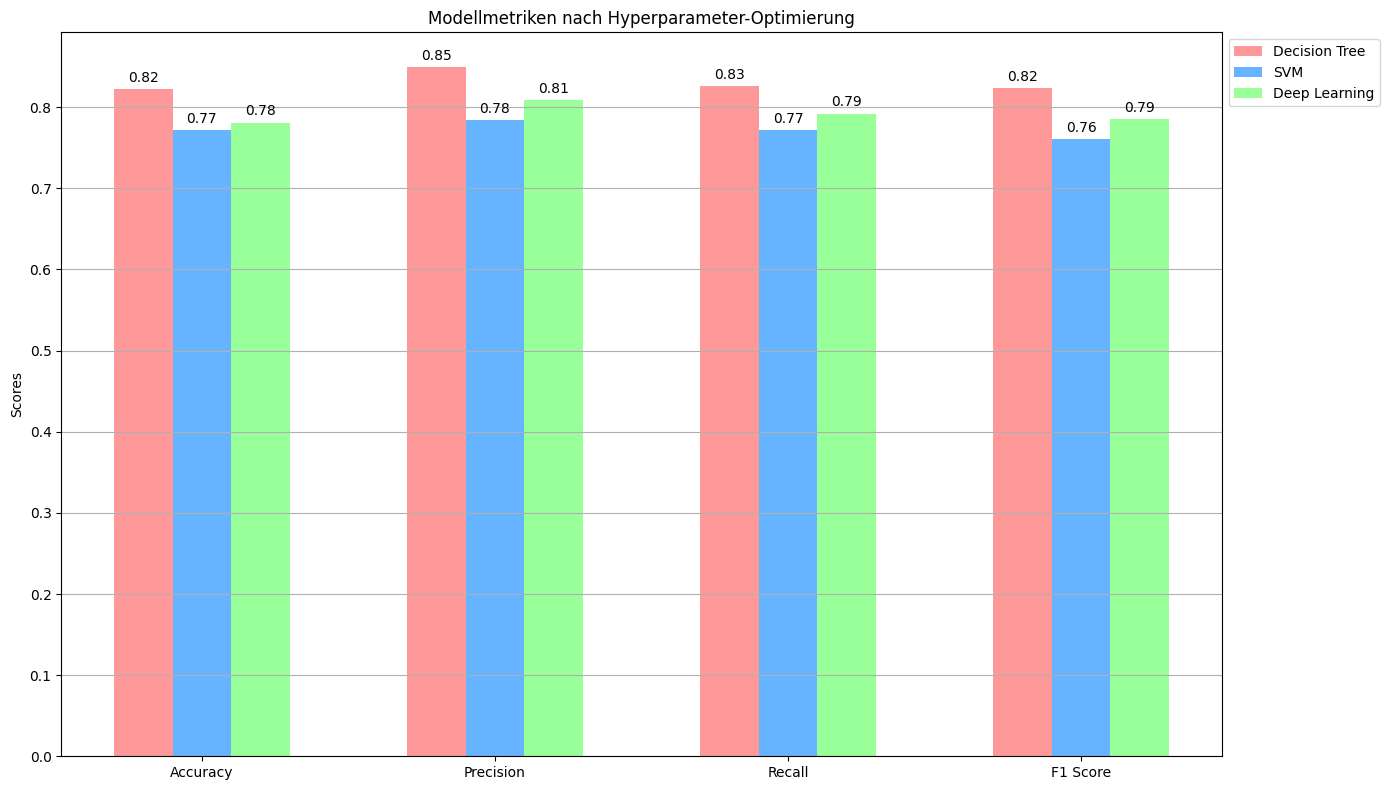

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Metriken
metrics = {
    "Decision Tree": [0.821892, 0.849766, 0.825603, 0.823911],
    "SVM": [0.7718, 0.784411, 0.7718, 0.761041],
    "Deep Learning": [0.781076, 0.80833, 0.792208, 0.785227]
}

labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(labels))  # Die Label-Positionen
width = 0.2  # Die Breite der Balken

fig, ax = plt.subplots(figsize=(14, 8))

# Farben für die Balken
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Balken hinzufügen
rects1 = ax.bar(x - width, metrics["Decision Tree"], width, label='Decision Tree', color=colors[0])
rects2 = ax.bar(x, metrics["SVM"], width, label='SVM', color=colors[1])
rects3 = ax.bar(x + width, metrics["Deep Learning"], width, label='Deep Learning', color=colors[2])

# Labels, Titel und Legende hinzufügen
ax.set_ylabel('Scores')
ax.set_title('Modellmetriken nach Hyperparameter-Optimierung')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Gitternetz hinzufügen
ax.yaxis.grid(True)

# Balkenbeschriftung
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

# Diagramm anzeigen
plt.show()


Quelle: ChatGPT, OpenAI, https://www.openai.com/